<a href="https://colab.research.google.com/github/Unnimayav/Transfer-learning/blob/main/transfer_learning_mask_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator



In [ ]:
I_SIZE=[244,244]

In [ ]:
train_path="/content/drive/MyDrive/mask data"
test_data="/content/drive/MyDrive/maskdatatest"

In [ ]:
vgg=VGG16(input_shape=I_SIZE+[3],weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(vgg.output)

In [ ]:
prediction=Dense(2,activation='softmax')(x)

In [ ]:
model=Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 244, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 244, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 122, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 122, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 122, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 61, 61, 128)       0     

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 shear_range=0.2)
test_datagen=ImageDataGenerator(rescale=1/255)
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_data,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Found 3170 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [ ]:
r=model.fit_generator(training_set,
                      validation_data=test_set,
                      epochs=5)

<ipython-input-12-8a439bf433a6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set,


Epoch 1/5
 82/100 [=======================>......] - ETA: 47s - loss: 0.3154 - accuracy: 0.8763

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 [==============================] - 289s 3s/step - loss: 0.2756 - accuracy: 0.8915 - val_loss: 0.0629 - val_accuracy: 0.9706
Epoch 2/5
100/100 [==============================] - 53s 528ms/step - loss: 0.0688 - accuracy: 0.9773 - val_loss: 0.0400 - val_accuracy: 0.9706
Epoch 3/5
100/100 [==============================] - 53s 527ms/step - loss: 0.0423 - accuracy: 0.9849 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 4/5
100/100 [==============================] - 52s 516ms/step - loss: 0.0398 - accuracy: 0.9868 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 5/5
100/100 [==============================] - 52s 520ms/step - loss: 0.0313 - accuracy: 0.9921 - val_loss: 0.0398 - val_accuracy: 0.9706


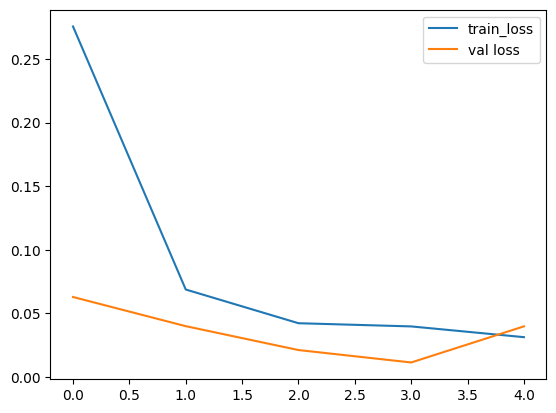

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()

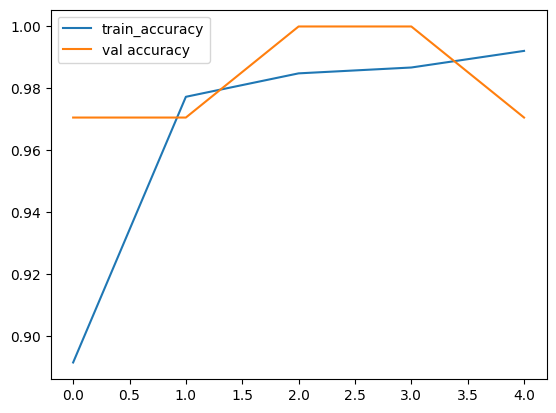

In [ ]:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
def predict_new(imgpath,model):
  image=cv2.imread(imgpath)
  cv2_imshow(image)
  image_resized=cv2.resize(image,(244,244))
  #print(image_resized.shape)
  image=image_resized.reshape(1,244,244,3)
  #print(image.shape)
  pred=model.predict(image)
  #print(pred)
  x=np.argmax(pred)
  if x==0:
    print('wearing mask')
  else:
    print("not wearing mask")

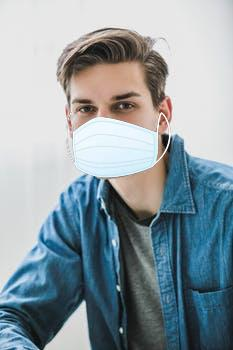

1/1 [==============================] - 0s 18ms/step
wearing mask


In [ ]:
path='/content/drive/MyDrive/maskdatatest/with_mask/10-with-mask.jpg'
predict_new(path,model)

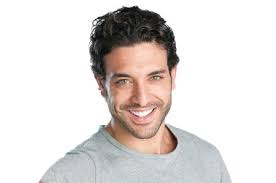

1/1 [==============================] - 0s 19ms/step
not wearing mask


In [ ]:
path='/content/drive/MyDrive/mask data/without_mask/without_mask_1000.jpg'
predict_new(path,model)